In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf

2024-02-29 13:24:35.132475: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 13:24:35.132643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 13:24:35.331302: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [4]:
(Train_x, train_y), (Test_x, test_y) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


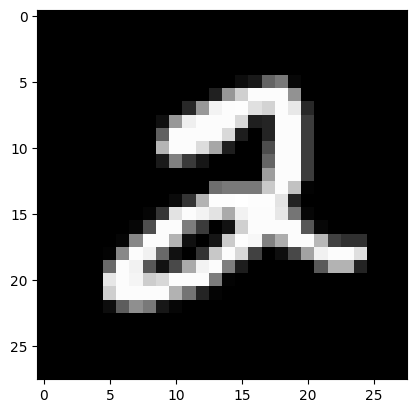

In [5]:
plt.imshow(Train_x[5], cmap='gray')

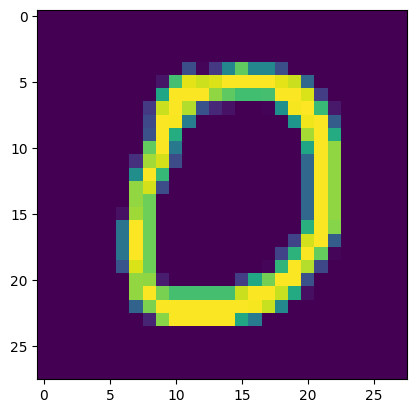

In [6]:
plt.imshow(Test_x[10])

In [7]:
train_y.real

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

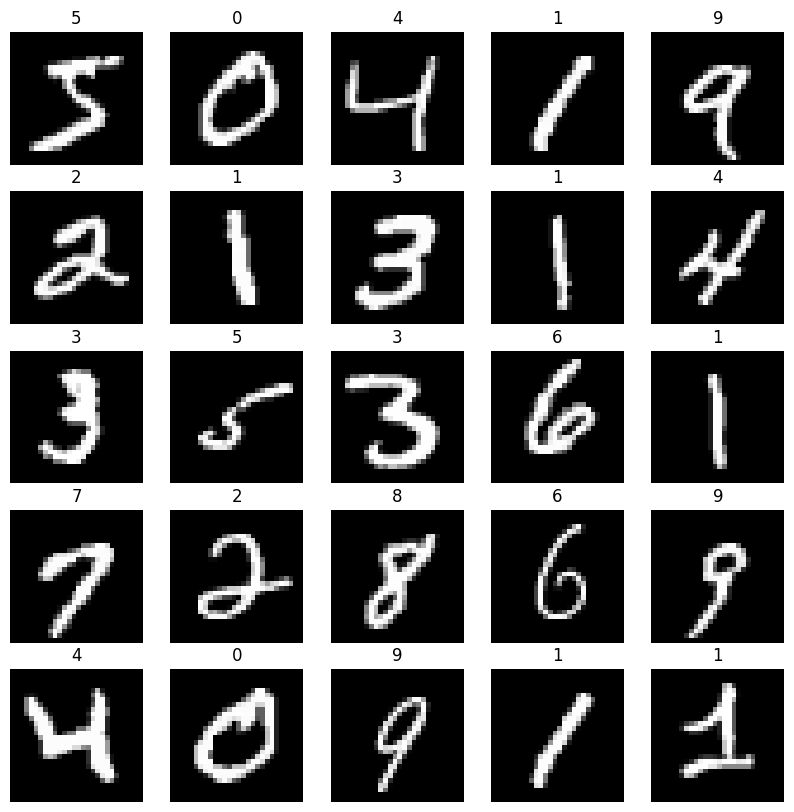

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(Train_x[i], cmap='gray')
    plt.title(train_y[i])
    plt.axis('off')
plt.show()

In [9]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(units=128, activation="relu"),
tf.keras.layers.Dense(units=10, activation="softmax")])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(Train_x, train_y, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8250 - loss: 6.7283
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9060 - loss: 0.3962
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9274 - loss: 0.2797
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9314 - loss: 0.2616
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9362 - loss: 0.2412
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9412 - loss: 0.2231
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9457 - loss: 0.2099
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9500 - loss: 0.1907
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9511 - loss: 0.1898
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9533 - loss: 0.1829
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9530 - loss: 0.1893
Epoch 12/15
1875/1875 ━━━━━

In [12]:
pred = model.predict(Test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
model.evaluate(Test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9388 - loss: 0.3755


[0.32918983697891235, 0.944100022315979]

In [14]:
Test_x.shape

(10000, 28, 28)

In [15]:
test_y.shape

(10000,)

In [16]:
train_y.shape

(60000,)

In [17]:
Train_x.shape

(60000, 28, 28)

In [18]:
new_image = np.ones((28, 28)) * 255
# Define the number you want to draw
number = 2

# Draw the number on the image
for i in range(28):
    for j in range(28):
        if (i + j) % 2 == number % 2:
            new_image[i][j] = 0

In [19]:
prediction = model.predict(np.expand_dims(new_image, axis=0))

predicted_number = np.argmax(prediction)

print("Predicted number:", predicted_number)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted number: 8


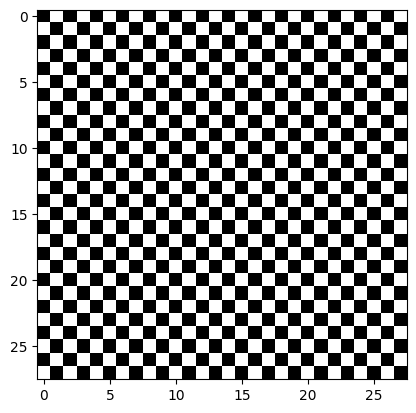

In [20]:
plt.imshow(new_image, cmap='gray')
plt.show()